<a href="https://colab.research.google.com/github/alexandrufalk/tensorflow/blob/Master/02_neural_network_classification_tensorflow_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_moons

n_samples=2000
# Create moons

X,y= make_moons(n_samples=n_samples,noise=0.3, random_state=42)



In [3]:
X[:5]

array([[ 1.51757081,  0.42491738],
       [ 0.30426848,  0.99969089],
       [ 0.48592383, -0.22291316],
       [-0.93357941, -0.0935787 ],
       [ 0.68421029, -0.43691154]])

In [4]:
y[:5]

array([1, 0, 1, 0, 1])

In [5]:
#Make dataframe of features and labels
moons=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],'label':y})
moons.head()

,X0,X1,label
0,1.517571,0.424917,1
1,0.304268,0.999691,0
2,0.485924,-0.222913,1
3,-0.933579,-0.093579,0
4,0.684210,-0.436912,1


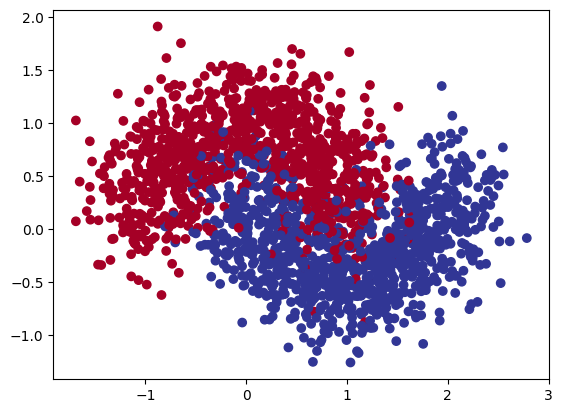

In [10]:
#Visualize
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


In [11]:
X.shape,y.shape

((2000, 2), (2000,))

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train)

1600

In [14]:
# Create the model

#Set random seed
tf.random.set_seed(42)

#create the model
model1=tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])

#compile the model
model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
#fit the model
history1=model1.fit(X_train,y_train,epochs=30)

Epoch 1/30
50/50 [==============================] - 1s 2ms/step - loss: 0.6793 - accuracy: 0.4731
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7038
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7713
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8244
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8388
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8462
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8494
Epoch 8/30
50/50 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8525
Epoch 9/30
50/50 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8537
Epoch 10/30
50/50 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8537
Epoch 11/30
50/50 [

In [15]:
#Evaluate the model
loss,accuracy=model1.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy{accuracy}")

13/13 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 0.8850
loss:0.2711998522281647
accuracy0.8849999904632568


In [16]:
# to visualize the model's predictions we're going to create a function plot_decision_boundary()

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  #Create X values
  x_in=np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  # Make predictions
  y_pred=model.predict(x_in)

  # Check for multi-class
   # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


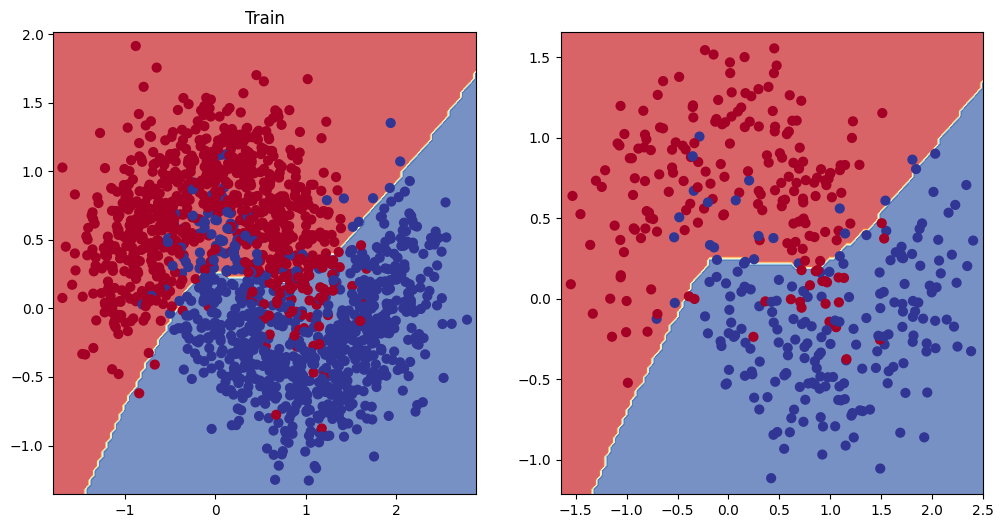

In [17]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model1,X=X_train,y=y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model1,X=X_test,y=y_test)
plt.show()

In [37]:
# Create the model

#set random seeds
tf.random.set_seed(42)

#create the model
model2=tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])

#Create the learning rate scheduler callbak

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

#compile the model
model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
#fit the model
history2=model2.fit(X_train,y_train, epochs=50,verbose=0,callbacks=[lr_scheduler])

In [38]:
#Evaluate the model
loss,accuracy=model2.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy{accuracy}")

13/13 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.9050
loss:0.24915404617786407
accuracy0.9049999713897705


<Axes: xlabel='epochs'>

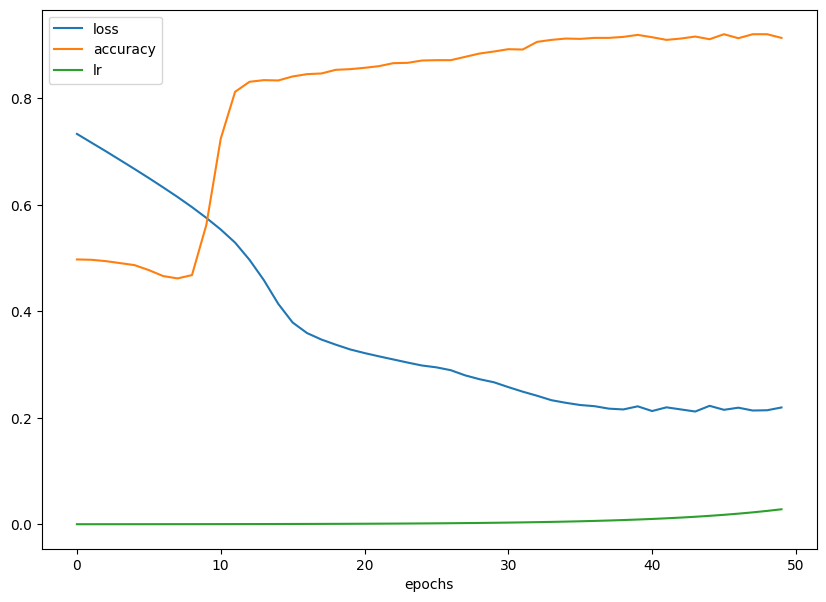

In [39]:
# Checkout the history
pd.DataFrame(history2.history).plot(figsize=(10,7),xlabel='epochs')

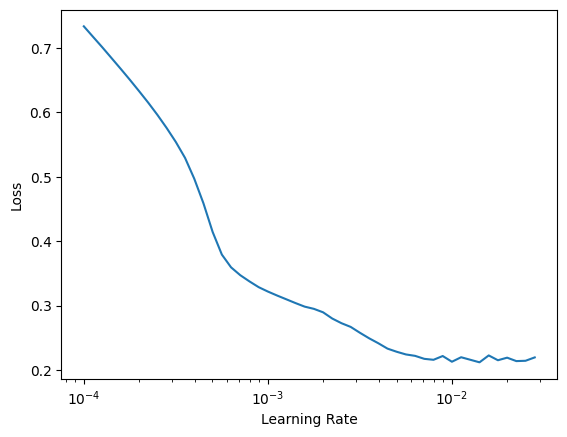

In [40]:
# Plot learning rate vs. loss
plt.plot(history2.history['lr'], history2.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.xscale('log')
plt.show()

In [53]:
10e-2

0.1

In [68]:
# Create the model with learning rate of 0.1

#set random seeds
tf.random.set_seed(42)

#create the model
model3=tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])



#compile the model
model3.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(0.1),
               metrics=['accuracy'])
#fit the model
history3=model3.fit(X_train,y_train, epochs=50,verbose=0)

In [69]:
#Evaluate the model
loss,accuracy=model3.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy{accuracy}")

13/13 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9100
loss:0.2544879913330078
accuracy0.9100000262260437


313/313 [==============================] - 1s 4ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


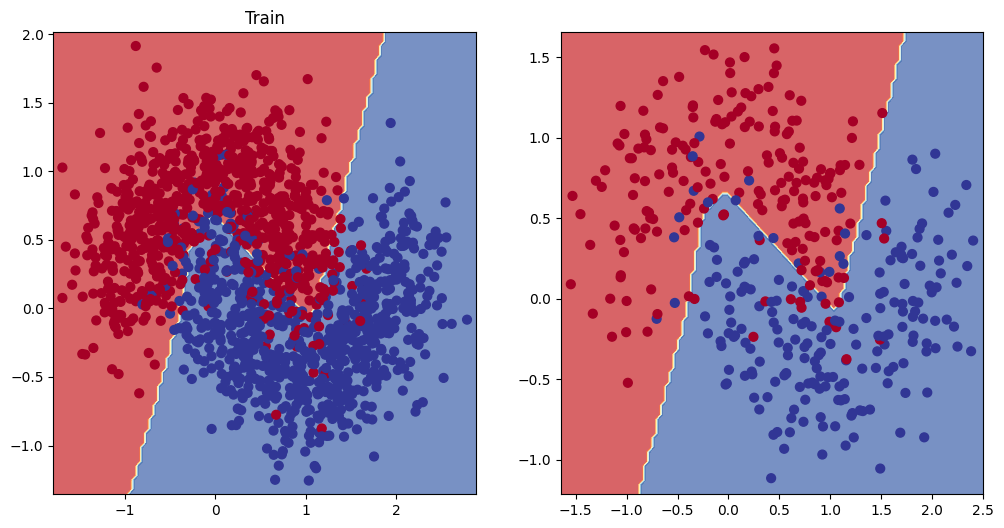

In [70]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model3,X=X_train,y=y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model3,X=X_test,y=y_test)
plt.show()